In [1]:
import tensorflow as tf
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/deeplearning/WELFake_Dataset.csv')
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [6]:
# mengambil data teks
texts = df['text'].astype(str).values  # Convert to string
labels = df['label'].values

# Tokenisasi teks dan vektorisasi kata-kata
max_words = 1000 # menentukan 1000 kata dengan frekuensi tertinggi yang akan diterapkan oleh Tokenizer.
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequence agar input data memiliki panjang yang sama dan dimensi yang konsisten
maxlen = 500
data = pad_sequences(sequences, maxlen=maxlen)

# Mengonversi label menjadi array numpy
labels = np.array(labels)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Membuat model Sequential
model = Sequential()

# Menambahkan lapisan Embedding untuk mengonversi kata-kata ke vektor
embedding_dim = 50
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

# Menambahkan lapisan Convolutional Neural Network (CNN)
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))

# Menambahkan lapisan LSTM
model.add(LSTM(100))

# Menambahkan lapisan Dense untuk output
# fungsi aktivasi sigmoid untuk menghasilkan output biner 0 dan 1 sebagau probabilitas
model.add(Dense(1, activation='sigmoid'))

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Pelatihan model
model.fit(X_train, y_train, epochs=5, batch_size=2, validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/5
28854/28854 [==============================] - 2141s 74ms/step - loss: 0.1501 - accuracy: 0.9402 - val_loss: 0.1036 - val_accuracy: 0.9619
Epoch 2/5
28854/28854 [==============================] - 2086s 72ms/step - loss: 0.0972 - accuracy: 0.9638 - val_loss: 0.1034 - val_accuracy: 0.9610
Epoch 3/5
28854/28854 [==============================] - 2138s 74ms/step - loss: 0.0809 - accuracy: 0.9704 - val_loss: 0.0969 - val_accuracy: 0.9637
Epoch 4/5
28854/28854 [==============================] - 2140s 74ms/step - loss: 0.0722 - accuracy: 0.9731 - val_loss: 0.0969 - val_accuracy: 0.9669
Epoch 5/5
451/451 [==============================] - 27s 61ms/step - loss: 0.0944 - accuracy: 0.9653
Loss: 0.09437303245067596, Accuracy: 0.9652734398841858


2255/2255 [==============================] - 129s 57ms/step - loss: 0.0598 - accuracy: 0.9787
Test Loss: 0.05977340415120125, Test Accuracy: 0.9786924123764038
2255/2255 [==============================] - 129s 57ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     35028
           1       0.97      0.98      0.98     37106

    accuracy                           0.98     72134
   macro avg       0.98      0.98      0.98     72134
weighted avg       0.98      0.98      0.98     72134



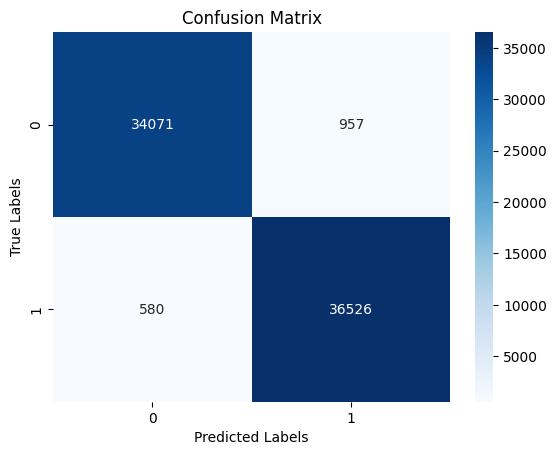

In [7]:
# data test
texts_test = df['text'].astype(str).values
labels_test = df['label'].values

# Tokenisasi data test dan vektorisasi kata-kata menggunakan tokenizer yang sudah ada
sequences_test = tokenizer.texts_to_sequences(texts_test)
data_test = pad_sequences(sequences_test, maxlen=maxlen)

# Mengonversi label uji menjadi array numpy
labels_test = np.array(labels_test)

# Evaluasi model dengan data test
test_loss, test_accuracy = model.evaluate(data_test, labels_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

predictions = model.predict(data_test)

# Mengonversi probabilitas prediksi menjadi label biner (0 atau 1)
predicted_labels = [round(pred[0]) for pred in predictions]

# Menampilkan classification report
print("Classification Report:\n", classification_report(labels_test, predicted_labels))

# Membuat confusion matrix
conf_matrix = confusion_matrix(labels_test, predicted_labels)

# Menampilkan confusion matrix menggunakan heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Contoh data teks
texts = df['text'].astype(str).values  # Convert to string
labels = df['label'].values

# Tokenisasi teks dan vektorisasi kata-kata
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequence agar memiliki panjang yang sama
maxlen = 20
data = pad_sequences(sequences, maxlen=maxlen)

# Mengonversi label menjadi array numpy
labels = np.array(labels)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Membuat model Sequential
model = Sequential()

# Menambahkan lapisan Embedding untuk mengonversi kata-kata ke vektor
embedding_dim = 50
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

# Menambahkan lapisan Convolutional Neural Network (CNN)
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))

# Menambahkan lapisan LSTM
model.add(LSTM(100))

# Menambahkan lapisan Dense untuk output
model.add(Dense(1, activation='sigmoid'))

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Membuat objek EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Pelatihan model dengan menggunakan callback EarlyStopping
model.fit(X_train, y_train, epochs=100, batch_size=2, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/100
28854/28854 [==============================] - 264s 9ms/step - loss: 0.3463 - accuracy: 0.8434 - val_loss: 0.3202 - val_accuracy: 0.8512
Epoch 2/100
28854/28854 [==============================] - 269s 9ms/step - loss: 0.2880 - accuracy: 0.8727 - val_loss: 0.3078 - val_accuracy: 0.8615
Epoch 3/100
28854/28854 [==============================] - 290s 10ms/step - loss: 0.2464 - accuracy: 0.8958 - val_loss: 0.2965 - val_accuracy: 0.8714
Epoch 4/100
28854/28854 [==============================] - 289s 10ms/step - loss: 0.2086 - accuracy: 0.9148 - val_loss: 0.3000 - val_accuracy: 0.8730
Epoch 5/100
28854/28854 [==============================] - 271s 9ms/step - loss: 0.1759 - accuracy: 0.9305 - val_loss: 0.3027 - val_accuracy: 0.8727
Epoch 6/100
451/451 [==============================] - 2s 5ms/step - loss: 0.2965 - accuracy: 0.8714
Loss: 0.2965419590473175, Accuracy: 0.8713523149490356
